In [28]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List

In [29]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----.-    ---                                                           
|.       ....      .|                                                           
|.... ..... ........|                                                           
|..   . ...       ..|                                                           
|...... ... ... ....|                                                           
|..     ... . . .  .|                                                           
|.. ....... . . ....|                                                           
|@. .   ... . .   ..|                                                           
|.... ...>. . ......|      

In [30]:
!python -m minihack.scripts.env_list


MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

In [31]:
def build_path(parent: dict, target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    while target is not None:
        path.append(target)
        target = parent[target]
    path.reverse()
    return path

## Breadth-First Search (BFS)¶

In [32]:
def bfs(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    # Create a queue for BFS and mark the start node as visited
    queue = deque()
    visited = set()
    queue.append(start)
    visited.add(start)

    # Create a dictionary to keep track of the parent node for each node in the path
    parent = {start: None}

    while queue:
        # Dequeue a vertex from the queue
        current = queue.popleft()

        # Check if the target node has been reached
        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        # Visit all adjacent neighbors of the dequeued vertex
        for neighbor in get_valid_moves(game_map, current):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    print("Target node not found!")
    return None

In [33]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----.-        ---                                                   
|.           ....          .|                                                   
|........ ..... ......... ..|                                                   
|..     . . ...         . ..|                                                   
|.... ... . ... ....... ....|                                                   
|..   .   . ... .     .   ..|                                                   
|.. ... ... ... . ... ... ..|                                                   
|.. .   . .  .> . . .   . ..|                                                   
|.... ... ..... ... . ... .

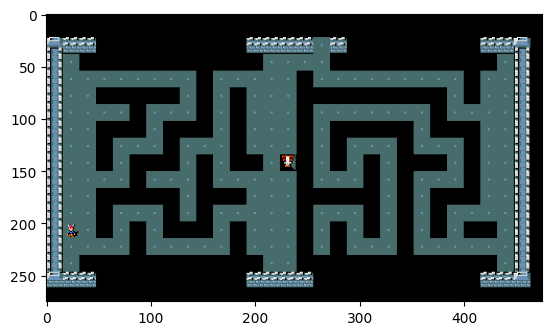

In [34]:
plt.imshow(state['pixel'][25:300, :475])

In [35]:
game_map = state['chars']
game = state['pixel']

In [36]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (14, 1)
Target position: (10, 14)


In [37]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 431 µs, sys: 32 µs, total: 463 µs
Wall time: 457 µs


In [38]:
path

[(14, 1),
 (15, 1),
 (15, 2),
 (15, 3),
 (15, 4),
 (14, 4),
 (13, 4),
 (13, 5),
 (13, 6),
 (14, 6),
 (15, 6),
 (15, 7),
 (15, 8),
 (15, 9),
 (15, 10),
 (14, 10),
 (13, 10),
 (13, 11),
 (13, 12),
 (13, 13),
 (13, 14),
 (12, 14),
 (11, 14),
 (10, 14)]

In [39]:
actions = actions_from_path(start, path[1:])

In [40]:
actions

[2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]

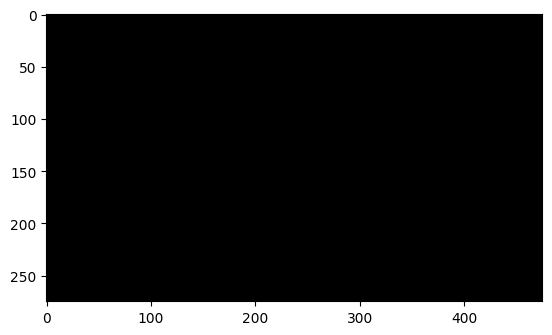

In [41]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [42]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/simple_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

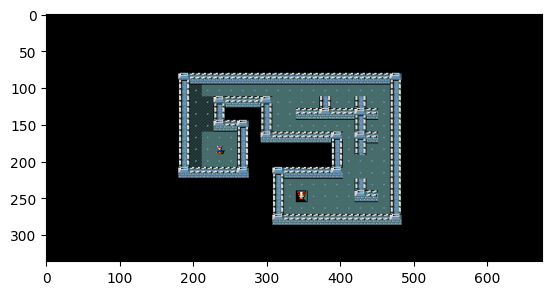

In [43]:
plt.imshow(state['pixel'][:, 300:975])

In [44]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [45]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 1.12 ms, sys: 77 µs, total: 1.19 ms
Wall time: 2.7 ms


In [46]:
actions = actions_from_path(start, path[1:])

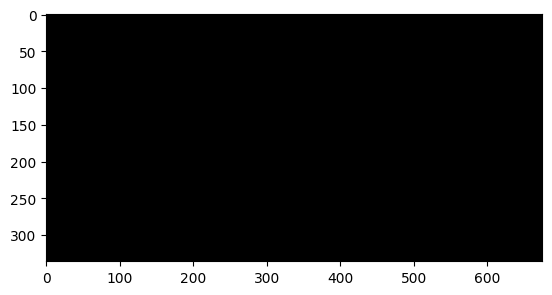

In [47]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [48]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
----.-      ----          ---                                                   
|. ..        ..            .|                                                   
|.... ........... ... ......|                                                   
|..         ... . .   .   ..|                                                   
|...... ....... . . ... ....|                                                   
|.    . .   ... . . .   . ..|                                                   
|.... . ... ... . ..... . ..|                                                   
|.. . .   .  .. .       .  .|                                                   
|.. . ... ..... . ..... ...

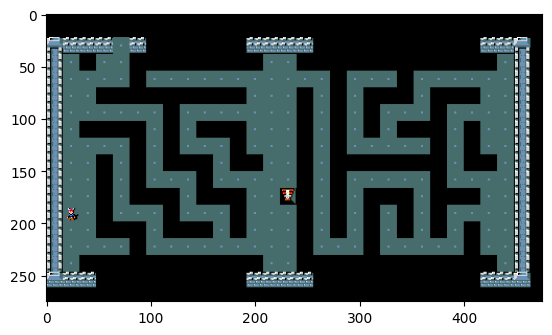

In [49]:
plt.imshow(state['pixel'][25:300, :475])

## A* Search Algorithm

In [50]:
game_map = state['chars']
game = state['pixel']

In [51]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (13, 1)
Target position: (12, 14)


In [52]:
def a_star(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = PriorityQueue()
    close_list = []
    # additional dict which maintains the nodes in the open list for an easier access and check
    support_list = {}

    starting_state_g = 0
    starting_state_h = h(start, target)
    starting_state_f = starting_state_g + starting_state_h

    open_list.put((starting_state_f, (start, starting_state_g)))
    support_list[start] = starting_state_g
    parent = {start: None}

    while not open_list.empty():
        # get the node with lowest f
        _, (current, current_cost) = open_list.get()
        # add the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue
            # compute neighbor g, h and f values
            neighbor_g = 1 + current_cost
            neighbor_h = h(neighbor, target)
            neighbor_f = neighbor_g + neighbor_h
            parent[neighbor] = current
            neighbor_entry = (neighbor_f, (neighbor, neighbor_g))
            # if neighbor in open_list
            if neighbor in support_list.keys():
                # if neighbor_g is greater or equal to the one in the open list, continue
                if neighbor_g >= support_list[neighbor]:
                    continue
            
            # add neighbor to open list and update support_list
            open_list.put(neighbor_entry)
            support_list[neighbor] = neighbor_g

    print("Target node not found!")
    return None

In [53]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.82 ms


In [54]:
actions = actions_from_path(start, path[1:])

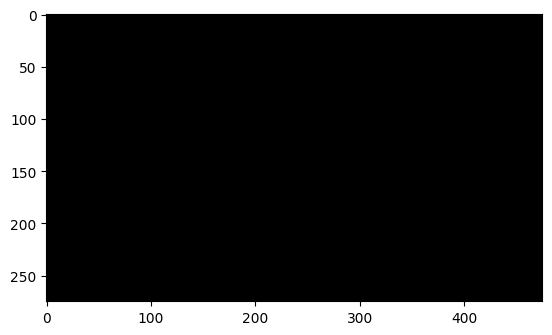

In [55]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [56]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/simple_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

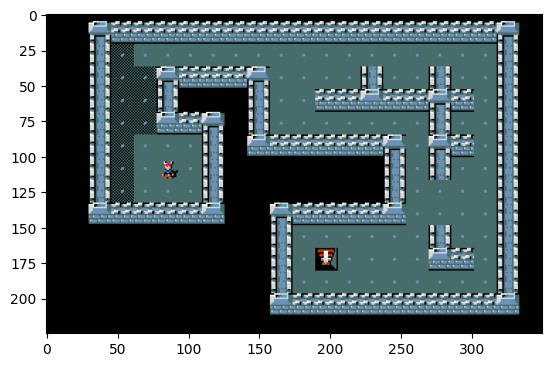

In [57]:
plt.imshow(state['pixel'][75:300, 450:800])

In [58]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [59]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 1.42 ms, sys: 85 µs, total: 1.5 ms
Wall time: 1.38 ms


In [60]:
actions = actions_from_path(start, path[1:])

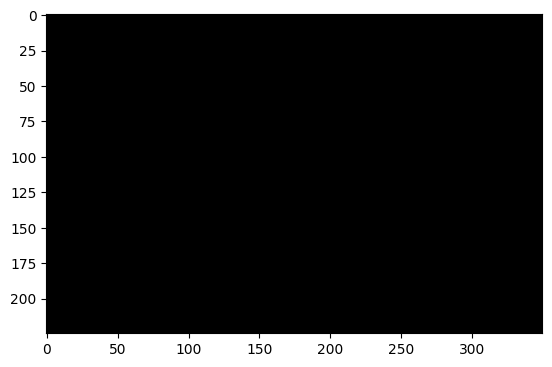

In [61]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

In [62]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/complex_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

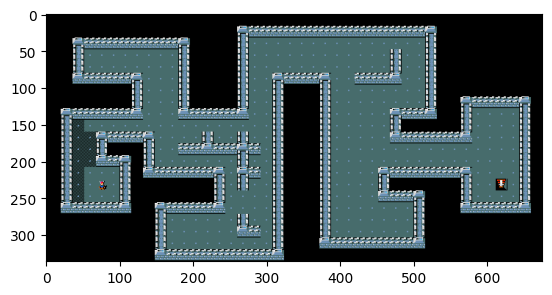

In [63]:
plt.imshow(state['pixel'][:, 300:975])

In [64]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [65]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 5.23 ms, sys: 0 ns, total: 5.23 ms
Wall time: 11.6 ms


In [66]:
actions = actions_from_path(start, path[1:])

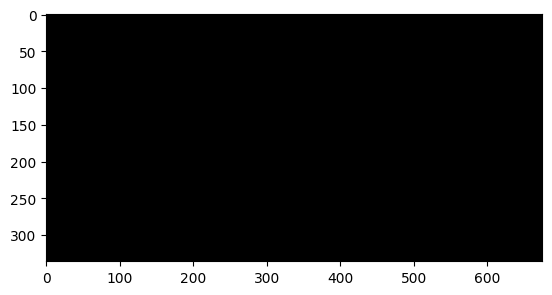

In [67]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [68]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "/home/nazifa/minihack/lib/python3.8/site-packages/complex_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

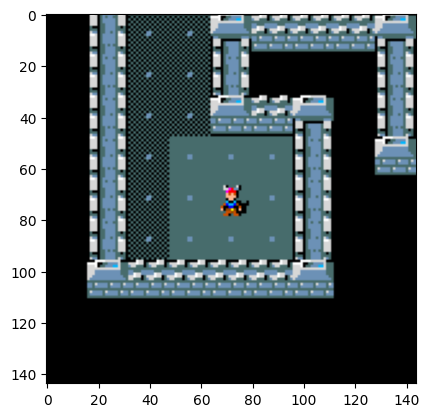

In [69]:
plt.imshow(state['pixel_crop'])

In [70]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [71]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 5.19 ms, sys: 4.04 ms, total: 9.23 ms
Wall time: 12.2 ms


In [72]:
actions = actions_from_path(start, path[1:])

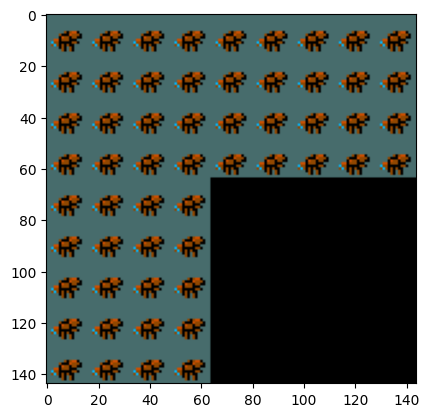

In [73]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])

## Hill Climb search



In [98]:
def build_path_HillClimb(parent: dict, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    current = target

    while current is not None and current != start:
        path.append(current)
        current = parent[current]

    path.append(start)  # Add the starting point to the path
    path.reverse()

    return path

In [99]:
def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = [start]
    close_list = []
    parent = {start: None}

    while open_list:
        # getting the current node
        current = open_list.pop()
        # adding the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path_HillClimb(parent, start,target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue

            # compute neighbor h value
            neighbor_h = h(neighbor, target)
            parent[neighbor] = current
            # if neighbor not in open list, adding it
            if neighbor not in open_list:
                open_list.append(neighbor)

    print("Target node not found!")
    return None

In [100]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|...... ......... ....... ..|                                                   
|..   . .   ... .     . . ..|                                                   
|.. . . . ..... ..... . . ..|                                                   
|.. . .   .  ..     . . . ..|                                                   
|.. ..... ....> ... . . ....|                                                   
|..     . . ... .   . .   ..|                                                   
|.... ... . ... ... . ... .

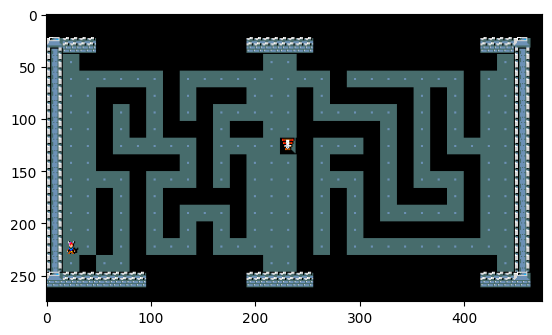

In [101]:
plt.imshow(state['pixel'][25:300, :475])

In [102]:
game_map = state['chars']
game = state['pixel']

In [103]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (15, 1)
Target position: (9, 14)


In [104]:
%%time
path = hill_climb(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 149 ms, sys: 23.7 ms, total: 172 ms
Wall time: 185 ms


In [105]:
path

[(15, 1),
 (14, 1),
 (13, 1),
 (12, 1),
 (11, 1),
 (10, 1),
 (9, 1),
 (8, 1),
 (7, 1),
 (6, 1),
 (5, 1),
 (4, 1),
 (3, 1),
 (2, 1),
 (1, 1),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3),
 (11, 3),
 (12, 3),
 (13, 3),
 (14, 3),
 (15, 3),
 (16, 3),
 (16, 2),
 (17, 2),
 (17, 1),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (20, 1),
 (20, 2),
 (19, 2),
 (19, 3),
 (18, 3),
 (18, 4),
 (17, 4),
 (17, 5),
 (16, 5),
 (15, 5),
 (14, 5),
 (13, 5),
 (12, 5),
 (11, 5),
 (10, 5),
 (9, 5),
 (8, 5),
 (7, 5),
 (6, 5),
 (5, 5),
 (4, 5),
 (3, 5),
 (2, 5),
 (1, 5),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 7),
 (2, 7),
 (3, 7),
 (4, 7),
 (5, 7),
 (6, 7),
 (7, 7),
 (8, 7),
 (9, 7),
 (10, 7),
 (11, 7),
 (12, 7),
 (13, 7),
 (14, 7),
 (15, 7),
 (16, 7),
 (17, 7),
 (18, 7),
 (18, 6),
 (19, 6),
 (19, 5),
 (20, 5),
 (20, 6),
 (20, 7),
 (20, 8),
 (19, 8),
 (19, 9),
 (18, 9),
 (17, 9),
 (16, 9),
 (15, 9),
 (14, 9),
 (13, 9),
 (12, 9),
 (11, 9),
 (10, 9),
 (

In [106]:
actions = actions_from_path(start, path[1:])

KeyError: 'pixel_crop'

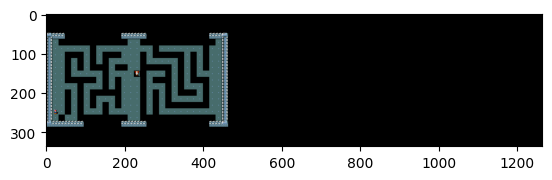

In [107]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])